In [1]:
%config InlineBackend.figure_format = 'svg'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['font.family'] = 'Times New Roman' #设置西文字体格式
import warnings

# Basis

## Representation of a Sequence

### Continuous-time Signal

$$f(t) = \sin{\Omega t}$$

where $\Omega = 2\pi f$ is Analogue Domain Frequency (模拟域频率)

### Discrete-time Signal

$$x(n) = \sin{\omega n}$$

where $\omega$ is Digital Domain Frequency (数字域频率)

Representations:

(1) with Set symbols:

$$x(n) = \{1,2,3,4,5...\}$$

(2) with Equation:

$$x(n) = \sin{\omega n}$$

where $n \in \mathbb{Z}$

(3) with Graphics

### Important Sequences

#### Unit Impulse Sequence (UIS)

$$\delta(n) = \{\cdots, 0, \underline{1}, 0, \cdots \}, n \in \mathbb{Z}$$

Based on the above, the Weighted UIS is given by:
$$a\delta(n)$$

And the Shifted UIS is given by ($n \in \mathbb{Z}^*$):
$$\delta(n \pm n_0)$$
where $\delta(n + n_0)$ represents a left shift, and $\delta(n - n_0)$ a right shift.

$\textbf{NOTE:}$ Shifting and Weighting of UIS can be utilised to represents ANY sequences.

#### Unit Step Sequence (USS) 单位阶跃序列

$$u(n) = \{\cdots, 0, \underline{1}, 1, 1, \cdots\}, n \in \mathbb{Z}$$

Based on the above, the Weighted USS is given by:
$$au(n)$$

And the Shifted UIS is given by ($n \in \mathbb{Z}^*$):
$$u(n \pm n_0)$$
where $u(n + n_0)$ represents a left shift, and $u(n - n_0)$ a right shift.

#### Unit Rectangle Sequence (URS) 单位矩形序列

$$R_N(n) = \{0, 1, 1, \cdots, 1\}, n \in \mathbb{N} \text{ and } n \leq N-1$$

$\textbf{Important Conclusions:}$

(1) $R_N(n) = u(n) - u(n-N)$

(2) $\delta(n) = u(n) - u(n-1)$

#### Real Exponential Sequence （RES）实指数序列（又称单边序列/因果序列）

$$a^nu(n), n \in \mathbb{Z}$$

#### Complex Exponential Sequence （CES）& Imaginary Exponential Sequence (IES)

$$e^{(\sigma + j\omega_0)n} = e^{\sigma n} \times e^{j\omega_0 n}, n \in \mathbb{Z}$$
where $e^{\sigma n}$ is RES, and $e^{j\omega_0 n}$ is IES, and:
$$e^{j\omega_0 n} = \cos{\omega_0 n} + j \sin{\omega_0 n}$$

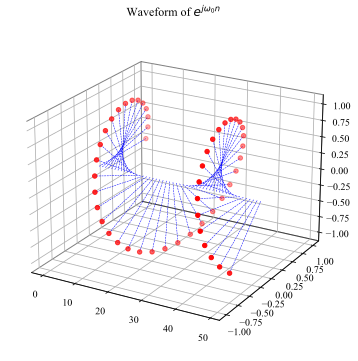

In [2]:
# 设置参数
omega_0 = 2 * np.pi / 30  # 示例频率
n = np.arange(0, 50, 1)   # 时间序列

# 计算复指数序列
complex_exp = np.exp(1j * omega_0 * n)

# 提取实部和虚部
real_part = np.real(complex_exp)
imag_part = np.imag(complex_exp)

# 创建三维图
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

# 三维散点图
ax.scatter(n, real_part, imag_part, color = 'r')

# 连线
for i in range(len(n)):
    ax.plot([n[i], n[i]], [0, real_part[i]], [0, imag_part[i]], color='blue', linestyle='--', linewidth=0.5)

# 设置坐标轴标签

# 设置标题
ax.set_title('Waveform of $e^{j\omega_0 n}$')

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

ax.view_init(azim=-60, elev=22)

plt.show()

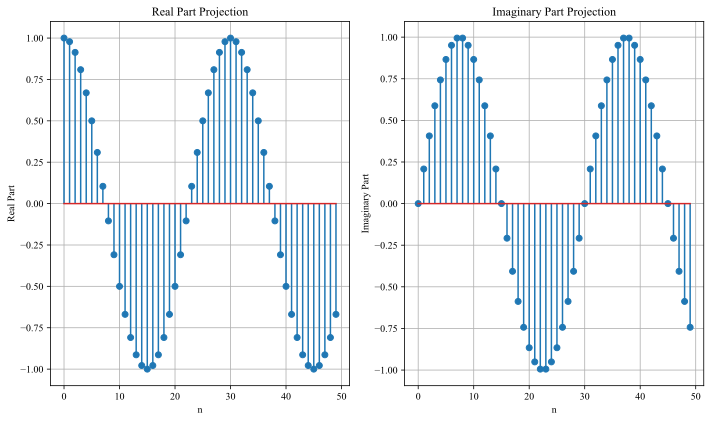

In [3]:
warnings.filterwarnings('ignore')
# 绘制实部和虚部投影的二维图并显示在一个图表上
plt.figure(figsize=(10, 6))

# 实部投影
plt.subplot(1, 2, 1)
plt.stem(n, real_part, use_line_collection=True)
plt.title('Real Part Projection')
plt.xlabel('n')
plt.ylabel('Real Part')
plt.grid(True)

# 虚部投影
plt.subplot(1, 2, 2)
plt.stem(n, imag_part, use_line_collection=True)
plt.title('Imaginary Part Projection')
plt.xlabel('n')
plt.ylabel('Imaginary Part')
plt.grid(True)

plt.tight_layout()
plt.show()

#### Sinusoidal Sequence （SINS）

$$\sin{\omega_0 n}, n \in \mathbb{Z}$$
where $\omega_0$ is the Digital Frequency

$\textbf{NOTE:}$ The Period $N$ is given by:
$$
N =
\begin{cases}
\frac{2\pi}{\omega_0}, & \text{if } \frac{2\pi}{\omega_0} \in \mathbb{Z} \\
p, & \text{if } \frac{2\pi}{\omega_0}=\frac{p}{q},(p, q \in \mathbb{Q}^+ \text{ and } p \perp q) \\
\text{NULL or } \infty, & \text{others}
\end{cases}
$$

### Operations of Sequences

(1) Addition: Omitted

(2) Product (Hadamard Product): Omitted

(3) Shifting: Omitted

(4) Flipping / Inversion: Omitted

(5) Scaling (尺度变换): The sequence $x(mn)$ is formed by sampling the sequence $x(n)$ at every $m^\text{th}$ point, where $m \in \mathbb{Z}^+$. For instance, assume that $x_1(n) = \{\underline{2}, 1, 1.5, -1, 1\}$, then:
$$x_2(n)=x_1(2n)=\{\underline{2}, 1.5, 1\}$$

#### Secondary Sequences

$$x(n)\delta(n) = x(0)\delta(n)$$
$$x(n)\delta(n - n_0) = x(n_0)\delta(n-n_0)$$

## Discrete Time System

### Operations

(1) Addition: $\boldsymbol{y}(n) = \boldsymbol{x}_1(n) + \boldsymbol{x}_2(n)$

(2) Multiplication: $\boldsymbol{y}(n) = \boldsymbol{x}_1(n) \odot \boldsymbol{x}_2(n)$

(3) Coefficient: $\boldsymbol{y}(n) = a\boldsymbol{x}(n)$

(4) Convolution: $\boldsymbol{y}(n) = \boldsymbol{x}(n) * \boldsymbol{h}(n)$, where $\boldsymbol{h}(n)$ is the Unit Impulse Response (UIR).

### Linear System

$$\text{For }\boldsymbol{y}(n)=\boldsymbol{T}[a\boldsymbol{x}(n)]: \boldsymbol{T}[a_1\boldsymbol{x}_1(n) + a_2\boldsymbol{x}_2(n)]= \boldsymbol{y}_1(n) + \boldsymbol{y}_2(n) \Rightarrow  \boldsymbol{y}(n) \text{ is linear}$$

Common Non-linear Systems:

$y(n)=x^2(n)$

$y(n)=e^{x(n)}$

$y(n)=kx(n) + b$ ($b\neq \boldsymbol{0}$)

### Time-invariant System

$$\text{For }\boldsymbol{y}(n)=\boldsymbol{T}[\boldsymbol{x}(n)]: \boldsymbol{T}[\boldsymbol{x}(n-n_0)]= \boldsymbol{y}(n-n_0) \Rightarrow  \boldsymbol{y}(n) \text{ is Time-invariant}$$

Common Time-variant Systems:

$y(n) = nx(n)$

$y(n) = x(n^2)$

$y(n) = x(-n)$

$y(n) = x(n)\sin(\omega n)$

### Linear Time-Invariant (LTI) System